<a href="https://colab.research.google.com/github/BenShieh233/NLP-Text-Mining/blob/main/IC5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import string
import re
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Part 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/INFOSYS765/yelp_review.csv")
df = df.iloc[:1000] # Keep only the first 1000 rows

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,stars,useful,text,funny,review_id,cool,date,user_id,business_id
0,4.0,0,First time waxing. I read all the other review...,0,V46usAbOSPIzurZy7DUU5A,0,2016-04-16 13:55:38,rD6noiuiMCcGuq6oPYFJdQ,b4NaB1u3AwgrhRMKsKgWsA
1,5.0,0,I love my manicure! Such an affordable place. ...,0,CpNSsju9NFc-Xrpf5Hfqhg,0,2020-01-18 05:32:54,tTsUSklzH1oxPp2usth84A,-otKp6RA94dfGsqa5jSDHQ
2,4.0,0,"Great food, fast service, they try to crank pe...",0,RP7A24xD14Cbegmr1AokNQ,0,2015-01-25 14:49:09,-cnIq2OmV8CleS4bLOvCxQ,EA10YCkaxzRoCEOB38xv1Q
3,1.0,0,Save your money and go across the street the f...,0,6a38lS1TjeWMqK-knuNAhA,0,2018-11-06 22:12:14,mzCkRflEka_vezCiBYYWGA,nkqaLepNTSrUYuZkzbBR5A
4,4.0,0,Oops...this was for the Main St location:\n\n-...,0,Q0QKTuceHzgmFeTtYSTzYg,0,2011-08-19 21:45:31,3zlK9eBVCpRWMPLjtAj6cQ,XtFhLvKV46H7a054X2_aFQ
...,...,...,...,...,...,...,...,...,...
995,5.0,0,Great momos.. chicken momo was amazing.. \nthe...,0,NKjAtoBv2_X5hvqNPFXYow,0,2017-03-19 01:26:22,QEzmBdpLMvcDNMEdbepBmg,fTSKD2e4FTyUbHCl93t1ow
996,4.0,6,A friend suggested we eat here about a week ag...,5,m90725S_BQ0QZf7MG5IMig,3,2014-04-07 21:39:36,w9zzMF3Z68omqkDbgsURoQ,JRA9UYISyXgkWzO3YAqNcg
997,5.0,2,Flip is the bomb! One of my all-time favorite ...,0,4I7AKPblHPCHSnGdFM0DAw,0,2013-03-04 05:40:33,1HtGcjZehXY8odctlBSIiQ,TA1KUSCu8GkWP9w0rmElxw
998,5.0,0,I went to this barber shop based on the yelp s...,0,957Jil3yuVaXFjgyU-_nFw,1,2014-10-09 14:54:41,JuNeSHwvwFWavIjp4GisrQ,Rq6QSybYpq9j9HUmlyhpEw


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
wn = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize text
    tokens = text.split()

    # Remove stopwords, lemmatize and drop words length < 2
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords and len(word) > 2]
    
    return text

### (1) Generate a Word Cloud

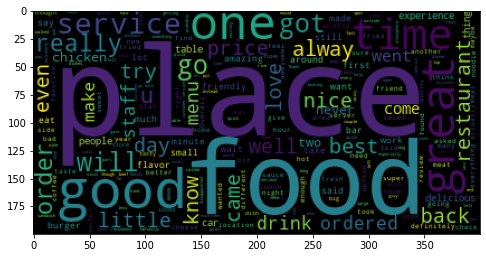

In [ ]:
text = ' '
for x in df['text']: 
    text+=' '+x

plt.figure(figsize=(8,10))
wc = WordCloud(max_words=1000,random_state=1).generate(text)
plt.imshow(wc)
plt.show()

In the Word Cloud, we observe that most of the comments on yelp are positive as 'good' appears in a high frequency. Apart from that, customers's reviews focus on the place and food of those restaurants the most, since 'place' and 'food' are the two largest word appearing in the Word Cloud.

### (2) TFIDF Representation & K-means

In [ ]:
vectorizer = TfidfVectorizer(analyzer = preprocess_text, stop_words='english')
X = vectorizer.fit_transform(df['text'])

In [ ]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 great
 food
 service
 always
 best
 place
 good
 staff
 friendly
 ive
Cluster 1:
 good
 place
 food
 time
 like
 would
 one
 order
 back
 chicken


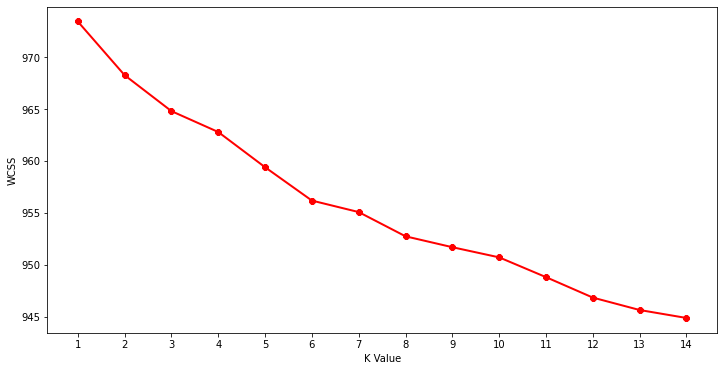

In [ ]:
# array to store WCSS values
wcss=[]

# loops from 1-10 as values of k
for i in range(1,15):
    # creates KMeans objects and fits the data
    km=KMeans(n_clusters=i)
    km.fit(X)
    # stores WCSS value 
    wcss.append(km.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()

The elbow curve does not show significant drop in WCSS at any number of K between 1 and 15. Therefore, we choose K = 3 based on the principle of simplicity and the diminishing decrease in WCSS after K = 3.

In [ ]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 burger
 order
 place
 good
 cheese
 fry
 get
 like
 time
 one
Cluster 1:
 food
 great
 good
 service
 place
 really
 always
 best
 chicken
 staff
Cluster 2:
 car
 time
 would
 day
 service
 back
 place
 get
 one
 best


### (3) Summarize the theme of the first three clusters.

In the first cluster, the reviews' theme are likely to be the feedback on food. The reason is that many food names such as "cheese", "fry", and "burger". As for the second cluster, its theme might be the feedback on service for the reason that "service" and "staff" appear in this cluster. The last cluster's theme might be the location of the restaurant since "car", "time", and "place" appear in this cluster.

### (4) Does it make sense?

However, the clustering results does not make so much sense, since there are a couple of duplicates in all of the three clusters. For example, "service" appear simultaneously in cluster 1 and cluster 2. Besides, we can find positive adjectives like "good" and "great" in all of the three classes. But after all, the clustering results make some sense to some extent.

## Part 2 Classification

In the classification part, I would like to use the Word2Vec as my text embeddings tools. In the first step, I would first create a new variable called `pos_sentiment` based on the stars as the target variable. Then I would split the data into a training and test set seperately. Then I would define and perform a text preprocessing function to clean the text of reviews, and then define a word embedding function to use averaging all embeddings for all sentences as the values of embedded vectors. In the last step, I would introduce the a deep learning model like LSTM and generate the predicted y based based on fitting X_train to y_train. In the end, I would calculate the F1-score and accuracy for the output of the deep learning algorithm.

In [ ]:
#basic imports
import warnings
warnings.filterwarnings('ignore')
import os
import wget
import gzip
import shutil
from time import time

#pre-processing imports
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

#imports related to modeling
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pos = [np.float64(1), np.float64(2), np.float64(3)]
df['pos_sentiment'] = np.where(df['stars'].isin(pos), 0, 1)

In [ ]:
df

,stars,useful,text,funny,review_id,cool,date,user_id,business_id,pos_sentiment
0,4.0,0,First time waxing. I read all the other review...,0,V46usAbOSPIzurZy7DUU5A,0,2016-04-16 13:55:38,rD6noiuiMCcGuq6oPYFJdQ,b4NaB1u3AwgrhRMKsKgWsA,1
1,5.0,0,I love my manicure! Such an affordable place. ...,0,CpNSsju9NFc-Xrpf5Hfqhg,0,2020-01-18 05:32:54,tTsUSklzH1oxPp2usth84A,-otKp6RA94dfGsqa5jSDHQ,1
2,4.0,0,"Great food, fast service, they try to crank pe...",0,RP7A24xD14Cbegmr1AokNQ,0,2015-01-25 14:49:09,-cnIq2OmV8CleS4bLOvCxQ,EA10YCkaxzRoCEOB38xv1Q,1
3,1.0,0,Save your money and go across the street the f...,0,6a38lS1TjeWMqK-knuNAhA,0,2018-11-06 22:12:14,mzCkRflEka_vezCiBYYWGA,nkqaLepNTSrUYuZkzbBR5A,0
4,4.0,0,Oops...this was for the Main St location:\n\n-...,0,Q0QKTuceHzgmFeTtYSTzYg,0,2011-08-19 21:45:31,3zlK9eBVCpRWMPLjtAj6cQ,XtFhLvKV46H7a054X2_aFQ,1
...,...,...,...,...,...,...,...,...,...,...
995,5.0,0,Great momos.. chicken momo was amazing.. \nthe...,0,NKjAtoBv2_X5hvqNPFXYow,0,2017-03-19 01:26:22,QEzmBdpLMvcDNMEdbepBmg,fTSKD2e4FTyUbHCl93t1ow,1
996,4.0,6,A friend suggested we eat here about a week ag...,5,m90725S_BQ0QZf7MG5IMig,3,2014-04-07 21:39:36,w9zzMF3Z68omqkDbgsURoQ,JRA9UYISyXgkWzO3YAqNcg,1
997,5.0,2,Flip is the bomb! One of my all-time favorite ...,0,4I7AKPblHPCHSnGdFM0DAw,0,2013-03-04 05:40:33,1HtGcjZehXY8odctlBSIiQ,TA1KUSCu8GkWP9w0rmElxw,1
998,5.0,0,I went to this barber shop based on the yelp s...,0,957Jil3yuVaXFjgyU-_nFw,1,2014-10-09 14:54:41,JuNeSHwvwFWavIjp4GisrQ,Rq6QSybYpq9j9HUmlyhpEw,1


In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: train-test split
X = df['text']
y = df['pos_sentiment']
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

(1000,) (1000,)


In [ ]:
#preprocess the text.
def preprocess_corpus(texts):
    mystopwords = set(stopwords.words("english"))
    def remove_stops_digits(tokens):
        #Nested function that lowercases, removes stopwords and digits from a list of tokens
        return [token.lower() for token in tokens if token.lower() not in mystopwords and not token.isdigit()
               and token not in punctuation]
    #This return statement below uses the above function to process twitter tokenizer output further. 
    return [remove_stops_digits(word_tokenize(text)) for text in texts]

texts_processed_train = preprocess_corpus(X_train)
texts_processed_test = preprocess_corpus(X_test)
w2v_model = Word2Vec(texts_processed_train, size=300, window=5, min_count=2, workers=16, seed = 34)

In [ ]:
# Creating a feature vector by averaging all embeddings for all sentences
def embedding_feats(list_of_lists):
    DIMENSION = 300
    zero_vector = np.zeros(DIMENSION)
    feats = []
    for tokens in list_of_lists:
        feat_for_this =  np.zeros(DIMENSION)
        count_for_this = 0 + 1e-5 # to avoid divide-by-zero 
        for token in tokens:
            if token in w2v_model:
                feat_for_this += w2v_model[token]
                count_for_this +=1
        if(count_for_this!=0):
            feats.append(feat_for_this/count_for_this) 
        else:
            feats.append(zero_vector)
    return feats


train_vectors = embedding_feats(texts_processed_train)
test_vectors = embedding_feats(texts_processed_test)
print(len(train_vectors))

750


In [70]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
rnnmodel2 = Sequential()
rnnmodel2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
rnnmodel2.add(Dense(2, activation='sigmoid'))
rnnmodel2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Training the RNN')

rnnmodel2.fit(train.values, y_train.values,
          batch_size=32,
          epochs=1)

Training the RNN


ValueError: ignored

In [66]:
train = pd.DataFrame(train_vectors)

In [69]:
train.valuesl

array([[0.00180448, 0.0718803 , 0.01669675, ..., 0.15826779, 0.01252296,
        0.1404595 ],
       [0.00172211, 0.06776762, 0.01542174, ..., 0.14844494, 0.01185709,
        0.13254349],
       [0.00164358, 0.06064278, 0.01361828, ..., 0.13258569, 0.01073586,
        0.11837864],
       ...,
       [0.00154232, 0.06651065, 0.01512089, ..., 0.14542878, 0.01161331,
        0.13001356],
       [0.00187416, 0.07586331, 0.01743061, ..., 0.16579257, 0.0134207 ,
        0.14783975],
       [0.00174289, 0.08529268, 0.01935893, ..., 0.18515509, 0.01502483,
        0.16523186]])

In [58]:
y_train.values

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

However, up till the above step, I could not build a LSTM model by using the X_train_vector and the y_train_vector. 